# Lab 5

Ali Tejani, amt3639

Caroline Yao, chy253

Allen Hwang, ah45755

## Problem 1: Linear Discriminant Analysis

### 1. Plot samples from similar gaussians

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# randomly sample distributions 20 times each
cov1 = [[1,0.9,0.9],[0.9,1,0.9],[0.9,0.9,1]]
cov2 = [[1,0.8,0.8],[0.8,1,0.8],[0.8,0.8,1]]
p1 = np.random.multivariate_normal([0,0,0],cov1,20)
p2 = np.random.multivariate_normal([0,0,1],cov2,20)

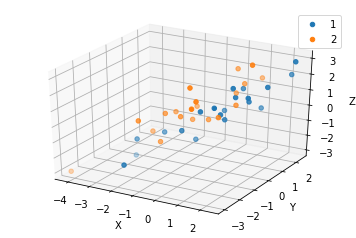

In [3]:
# plot on 3d graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p1[:,0],p1[:,1],p1[:,2],label='1')
ax.scatter(p2[:,0],p2[:,1],p2[:,2],label='2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

### 2. Project distributions onto 1D using LDA

We will simply use the formulas we learned in class, minimizing the variance within the groups of points and maximizing the variance between them.

w*max* = S*w*^-1 * (u1-u2)

In [4]:
# get means of distributions
mean1 = np.mean(p1,axis=0)
mean2 = np.mean(p2,axis=0)
print "mean of 1:"
print mean1
print "mean of 2:"
print mean2
mean_diff = mean2-mean1

mean of 1:
[ 0.27776495  0.23218663  0.29386404]
mean of 2:
[-0.36311153 -0.28690621  0.63766915]


In [5]:
# find the scatter matrices of the data points
scatter1 = np.dot((p1-mean1).T,p1)
scatter2 = np.dot((p2-mean2).T,p2)
print "cov of 1:"
print scatter1/p1.shape[0]
print "cov of 2:"
print scatter2/p2.shape[0]
scatterW = scatter1 + scatter2

cov of 1:
[[ 1.86408329  1.55521626  1.67492553]
 [ 1.55521626  1.47597073  1.50235498]
 [ 1.67492553  1.50235498  1.83426531]]
cov of 2:
[[ 1.63606631  1.27478479  1.35035177]
 [ 1.27478479  1.32653148  1.22687661]
 [ 1.35035177  1.22687661  1.6757172 ]]


In [6]:
# plug into equation
wmax = np.dot(np.linalg.inv(scatterW),mean_diff)

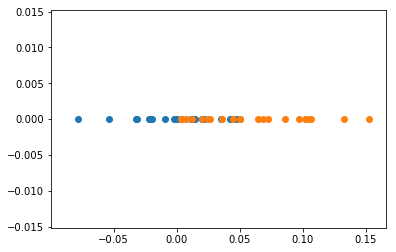

In [7]:
newPoints1 = np.dot(p1,wmax)
plt.scatter(newPoints1,[0]*len(newPoints1))
newPoints2 = np.dot(p2,wmax)
plt.scatter(newPoints2,[0]*len(newPoints2))

### 3. Using sklearn

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# combine points and create label array
combinedPoints = np.concatenate((p1,p2))
labels = np.array([1]*len(p1) + [2]*len(p2))

In [9]:
# perform transformation
clf = LinearDiscriminantAnalysis(n_components=2)
newPoints = clf.fit_transform(combinedPoints,labels)

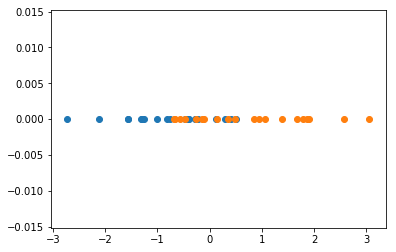

In [10]:
# plot separate distributions separately
plt.scatter(newPoints[:20],[0]*len(newPoints[:20]))
plt.scatter(newPoints[20:],[0]*len(newPoints[20:]))

The plots are almost identical. However they seem to be scaled differently, possibly due to an optimization in the sklearn library. 

## Problem 2. Chapter 4, Problem 10 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix

In [12]:
weekly = pd.read_csv("weekly.csv", index_col = 0)
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [13]:
weekly.shape

(1089, 9)

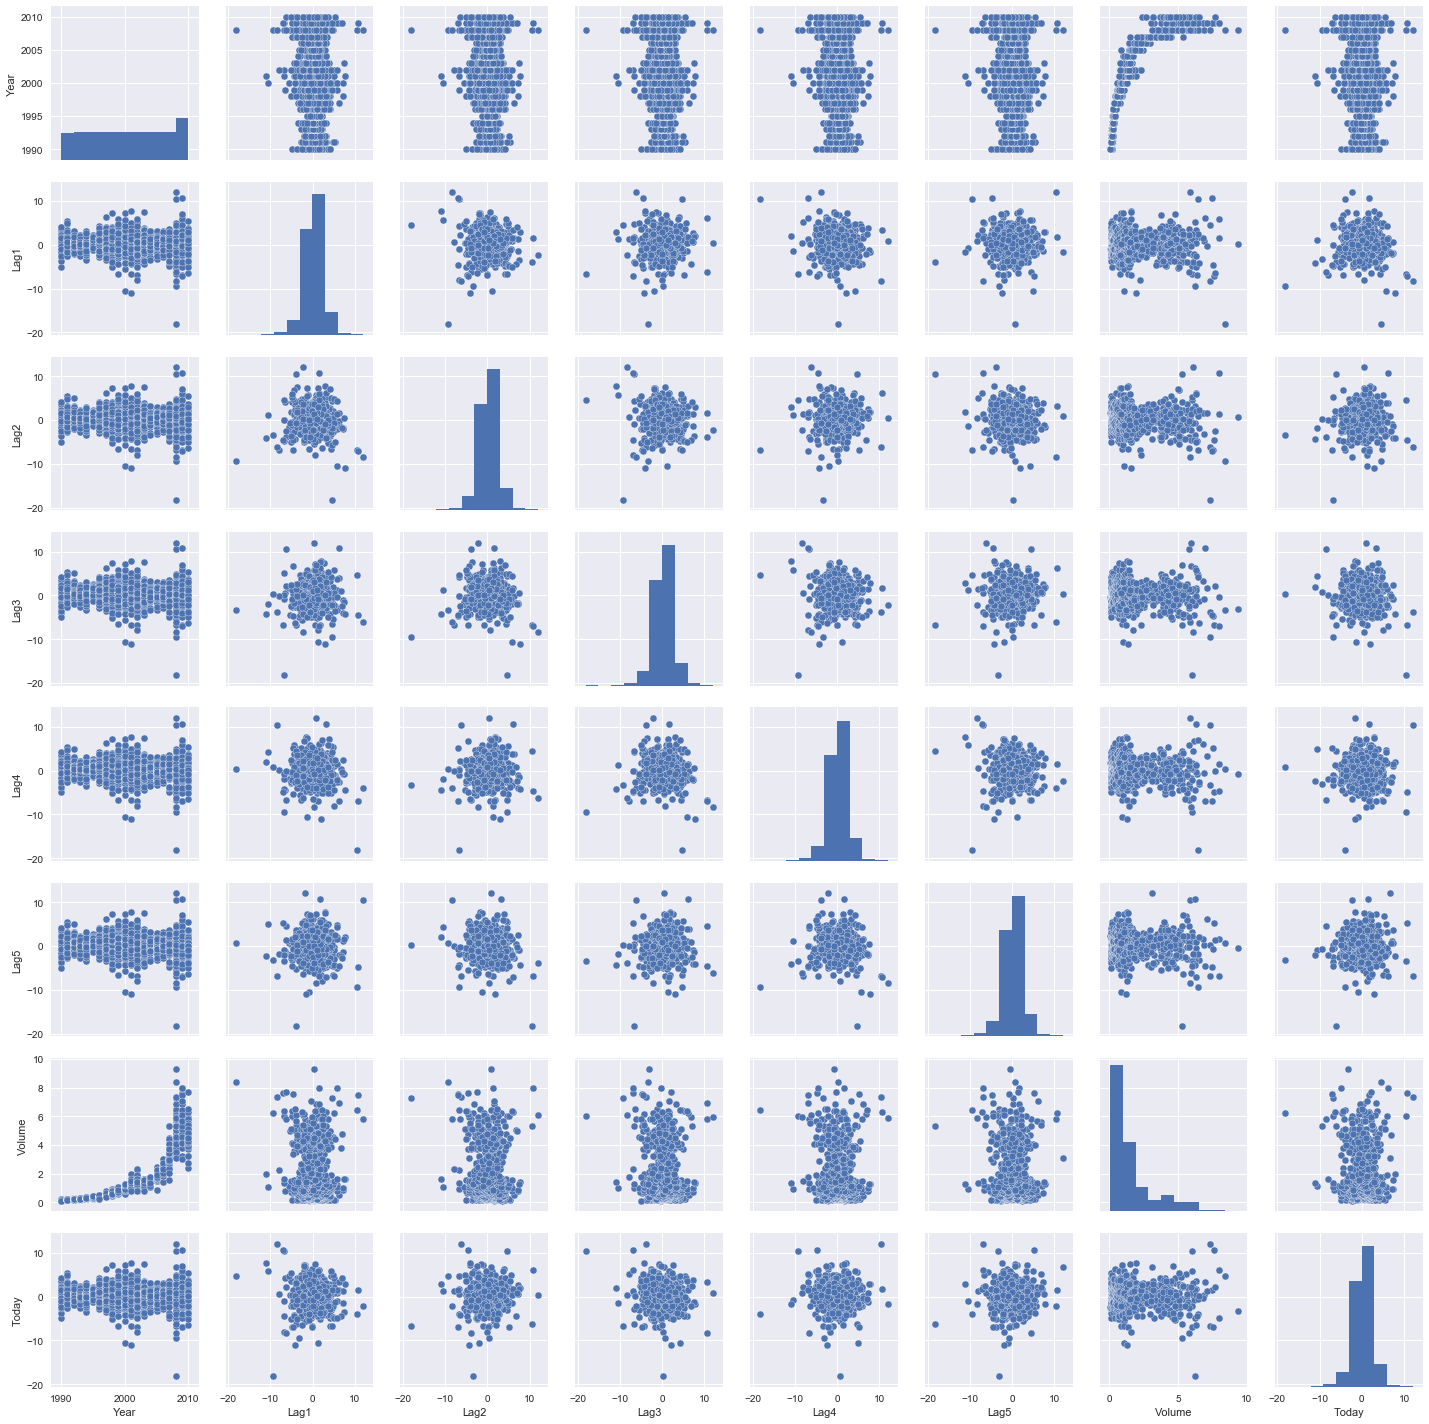

In [14]:
# plot features against each other to see correlation
import seaborn as sns
sns.pairplot(weekly)
plt.show()

There appears to be some patterns along the diagonal of the data set, and it seems that the first row is the transpose of the first column.  Let's take a closer look at Volume vs Today.

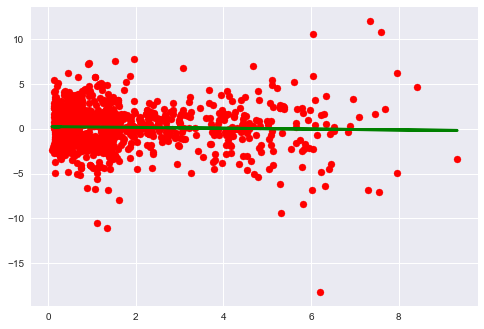

In [15]:
from sklearn import datasets, linear_model
Vol = weekly.as_matrix(["Volume"])
Today = weekly.as_matrix(["Today"])
lr = linear_model.LinearRegression()
lr.fit(Vol,Today)
plt.scatter(Vol, Today,  color='red')
plt.plot(Vol, lr.predict(Vol), color='green',
         linewidth=3)
plt.show()

The data doesn't seem to have any obvious pattern or relations.  Let's look at the differecne between up days and down days with volume.

In [16]:
def f(row):
    if row['Direction'] == 'Up':
        return 1
    return 0
weekly["Direction2"] = weekly.apply(f, axis = 1)
X = weekly.as_matrix(["Volume","Direction2"])
Y = weekly.as_matrix(["Today"])
lr = linear_model.LinearRegression()
lr.fit(X,Y)
print (lr.coef_, lr.intercept_)

(array([[-0.02812616,  3.41195348]]), array([-1.70134278]))


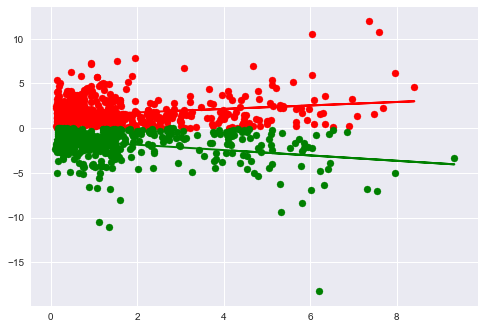

In [17]:

weekly_up = weekly[weekly.Direction2==1]
weekly_down = weekly[weekly.Direction2==0]
X_up = weekly_up.as_matrix(["Volume"])
Y_up = weekly_up.as_matrix(["Today"])
X_down = weekly_down.as_matrix(["Volume"])
Y_down = weekly_down.as_matrix(["Today"])
lr.fit(X_up, Y_up)
plt.scatter(X_up, Y_up,  color='red')
plt.plot(X_up, lr.predict(X_up), color='red',
         linewidth=2)
lr.fit(X_down, Y_down)
plt.scatter(X_down, Y_down,  color='green')
plt.plot(X_down, lr.predict(X_down), color='green',
         linewidth=2)
sns.despine()
plt.show()

From this data, it can be inferred that a log of movement in the stock(either up or down) drives a higher volume.  This makes sense; if the stocks makes huge jumps up, people will sell to collect profits, and also buy in hopes that the stock keeps moving up.  On the other hand, people will sell to mimize losses or buy out the share because the share is cheaper if the stock make huge jumps down.

### Logistic Regression on all data

In [18]:
logiReg = LogisticRegression()
test1 = weekly.loc[:, "Lag1":"Volume"]
test1.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
1,0.816,1.572,-3.936,-0.229,-3.484,0.154976
2,-0.270,0.816,1.572,-3.936,-0.229,0.148574
3,-2.576,-0.270,0.816,1.572,-3.936,0.159837
4,3.514,-2.576,-0.270,0.816,1.572,0.161630
5,0.712,3.514,-2.576,-0.270,0.816,0.153728


In [19]:
logiReg.fit(test1, weekly["Direction"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
test1.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618
std,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636
min,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465
25%,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022
50%,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680
75%,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727
max,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214


The matrix shows the result of describe() on the matrix made up of the predictor variables. All 5 Lag variables are very similar to each other. The Volume variable, by its nature, has a different structure, but just based on the above matrix, it is hard to say whether any of these variables are by themselves statistically significant.

### Confusion Matrix

In [21]:
results = logiReg.predict(test1)
print(results.shape)
results

(1089L,)


array(['Up', 'Up', 'Up', ..., 'Up', 'Up', 'Up'], dtype=object)

In [22]:
print(confusion_matrix(weekly["Direction"], results))

[[ 55 429]
 [ 47 558]]


Let's see which row corresponds to "Up" and which row corresponds to "Down"

In [23]:
up_correct = np.sum(np.all((weekly['Direction'] == 'Up' ,results =='Up'),axis=0))
up_errors = np.sum(np.all((weekly['Direction'] == 'Up' ,results =='Down'),axis=0))
print(up_correct)
print(up_errors)

558
47



Interpretation of the confusion matrix - 55 Downs and 558 Ups are predicted correctly. 47 Ups are predicted as downs and 429 Downs are predicted as ups.
Overall fraction of correct predictions - (55+558)/ (47+429+55+558) = 0.563

### Logistic Regression tested on 1990-2008 data

In [24]:
pre_2009=weekly.loc[:985, :]
pre_2009.tail()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction2
981,2008,12.026,-8.389,-6.198,-3.898,10.491,5.841565,-2.251,Down,0
982,2008,-2.251,12.026,-8.389,-6.198,-3.898,6.093950,0.418,Up,1
983,2008,0.418,-2.251,12.026,-8.389,-6.198,5.932454,0.926,Up,1
984,2008,0.926,0.418,-2.251,12.026,-8.389,5.855972,-1.698,Down,0
985,2008,-1.698,0.926,0.418,-2.251,12.026,3.087105,6.760,Up,1


In [25]:
post_2009 = weekly.loc[986:, :]
post_2009.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction2
986,2009,6.760,-1.698,0.926,0.418,-2.251,3.793110,-4.448,Down,0
987,2009,-4.448,6.760,-1.698,0.926,0.418,5.043904,-4.518,Down,0
988,2009,-4.518,-4.448,6.760,-1.698,0.926,5.948758,-2.137,Down,0
989,2009,-2.137,-4.518,-4.448,6.760,-1.698,6.129763,-0.730,Down,0
990,2009,-0.730,-2.137,-4.518,-4.448,6.760,5.602004,5.173,Up,1


In [26]:
lag2_training  = pre_2009["Lag2"]
lag2_training.shape

(985L,)

In [27]:
lag2_training = np.reshape(lag2_training, (985, 1)) # Deprecation removal
new_logistic_regr = LogisticRegression()
new_logistic_regr.fit(lag2_training, pre_2009["Direction"])

C:\Users\Ali\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
lag2_testing = post_2009["Lag2"]
lag2_testing.shape

(104L,)

In [29]:
lag2_testing = np.reshape(lag2_testing, (104, 1))
new_results = new_logistic_regr.predict(lag2_testing)
print(confusion_matrix(post_2009["Direction"], new_results))

[[ 9 34]
 [ 5 56]]


Assuming the same interpretation of the confusiono matrix as before, the matrix is as follows: - 9 Downs and 56 Ups are predicted correctly.  5 Ups were predicted as Downs and 34 Downs were predicted as Ups.  Overall fraction of correct predictions = (9+56)/(9 + 34 + 5 + 56) = 0.625

### Linear Discriminat Analysis

In [30]:
lag2_training.shape

(985L, 1L)

In [31]:
lda=LDA()
lda.fit(lag2_training,pre_2009["Direction"])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [32]:
ldaresults=lda.predict(lag2_testing)

In [33]:
print(confusion_matrix(post_2009["Direction"], ldaresults))

[[ 9 34]
 [ 5 56]]


This is the exact same confusion matrix as the last logistc regression model.  Let's see if they have the same predictions.

In [34]:
x1 = new_logistic_regr.predict_log_proba(lag2_training)
x2 = lda.predict_log_proba(lag2_training)
for num in range(5): # getting a small sampel
    print(x1[num], x2[num])

(array([-0.85074208, -0.55704038]), array([-0.85097261, -0.55686856]))
(array([-0.82583009, -0.57602457]), array([-0.82621748, -0.57572292]))
(array([-0.79087438, -0.60412607]), array([-0.79147622, -0.60362703]))
(array([-0.719923  , -0.66706965]), array([-0.72093726, -0.66610856]))
(array([-0.91688866, -0.5104272 ]), array([-0.91668814, -0.51056077]))


As the log probabilities returned by both these models are not the same, the fact that both these models return the same confusion matrix is not an issue.

Using the same interpretation as before, we can assume that it has the same ratio for correct predictions: 0.625

## QDA

In [35]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda.fit(lag2_training, pre_2009["Direction"])

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [36]:
qda_results = qda.predict(lag2_testing)
print(confusion_matrix(post_2009["Direction"], qda_results))

[[ 0 43]
 [ 0 61]]


The model appears to be predicting everything as up, and it doesn't seem as this was the intended effect.

Overall correct ratio: 61/104 = 0.59

### KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN()
knn.fit(lag2_training, pre_2009["Direction"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [38]:
knn_results = knn.predict(lag2_testing)
print(confusion_matrix(post_2009["Direction"], knn_results))

[[16 27]
 [22 39]]


16 Downs and 39 Ups are predicted correctly.  22 Ups and 27 Downs are predicted incorrectly.

Overall accuracy: (16 + 39) / (16+39+22+27) = 0.53

LDA and Logistic Regression seem to provide the best accuracy at 0.625

### KNN with varying N

In [39]:
for i in range(1,7):
    knn = KNN(i)
    knn.fit(lag2_training, pre_2009["Direction"])
    knn_results = knn.predict(lag2_testing)
    print(confusion_matrix(post_2009["Direction"], knn_results))

[[21 22]
 [31 30]]
[[31 12]
 [43 18]]
[[15 28]
 [20 41]]
[[26 17]
 [27 34]]
[[16 27]
 [22 39]]
[[20 23]
 [26 35]]


It seems that KNN with n=4 has the best results, but still lacking compared to LDA and logistic regression

# Problem 3: Chapter 5, Problem 5

In [40]:
default = pd.read_csv("default.csv",index_col=0)
default.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


### a. Logistic regression on default using income and balance

In [41]:
trainX = default[['balance','income']]
logitReg = LogisticRegression()
logitReg.fit(trainX,default['default'])
print(confusion_matrix(default["default"], logitReg.predict(trainX)))

[[9664    3]
 [ 333    0]]


The Logistic regression predicts 9664 true negatives, 0 true positives, 333 false negatives, and 3 false positives

### b-c. Validation set

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def validation_set_CV(default,test_size):
    # using only balance and income, fit a logistic regression on the validation set, whose size will be given by test_size
    default_train,default_test = train_test_split(default,test_size=test_size)
    xTrain = default_train[['balance','income']]
    yTrain = default_train['default']
    logitReg = LogisticRegression()
    logitReg.fit(xTrain,yTrain)
    return 1 - accuracy_score(default_test["default"], logitReg.predict(default_test[['balance','income']]))
def plot_validation_error():
    # plot the error vs test size
    val_set_error = []
    for i in np.arange(.1,1,.1):
        val_set_error.append(validation_set_CV(default,i))
    plt.xlabel('Fraction of training set used as validation set')
    plt.scatter(np.arange(.1,1,.1),val_set_error)
    plt.show()
    print(np.around(val_set_error,decimals=4))

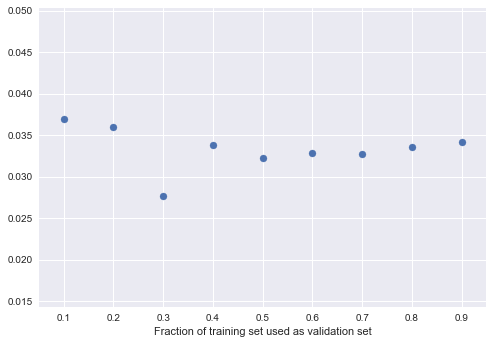

[ 0.037   0.036   0.0277  0.0337  0.0322  0.0328  0.0327  0.0336  0.0342]


In [43]:
plot_validation_error()

The validation set method seems to show best results when the validation set is small. However, this depends on the elements in the validation set, as running the cross-validation on different sets seems to change the results.

### d. Adding a student variable

In [44]:
# add a dummy variable for student
default = default.join(pd.get_dummies(default['student']))
default.head()

,default,student,balance,income,No,Yes
1,No,No,729.526495,44361.625074,1,0
2,No,Yes,817.180407,12106.134700,0,1
3,No,No,1073.549164,31767.138947,1,0
4,No,No,529.250605,35704.493935,1,0
5,No,No,785.655883,38463.495879,1,0


In [45]:
def validation_set_CV(default,test_size):
    # do the same as above, with student status added
    default_train,default_test = train_test_split(default,test_size=test_size)
    xTrain = default_train[['balance','income','No','Yes']]
    yTrain = default_train['default']
    logitReg = LogisticRegression()
    logitReg.fit(xTrain,yTrain)
    return 1 - accuracy_score(default_test["default"], logitReg.predict(default_test[['balance','income','No','Yes']]))

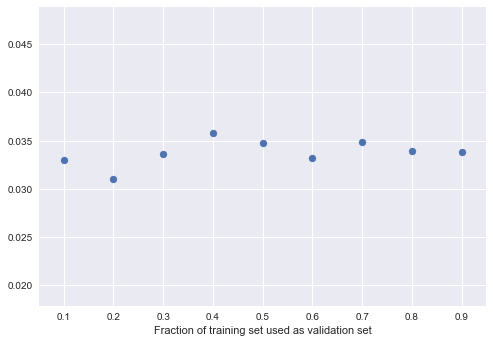

[ 0.033   0.031   0.0337  0.0357  0.0348  0.0332  0.0349  0.0339  0.0338]


In [46]:
plot_validation_error()

Adding a dummy variable for student did not do much for the errors. Smaller validation sets generally yield better results

# Problem 4: Chapter 5, Problem 8

### a. Generate simulated data set

In [47]:
np.random.seed(1)
x = np.random.randn(100)
y = np.random.randn(100)
y = x - (2*x**2) + np.random.randn(100)

n = 100, p = 2

The model used is:

y = x - 2x^2 + ϵ

### b. Create scatterplot

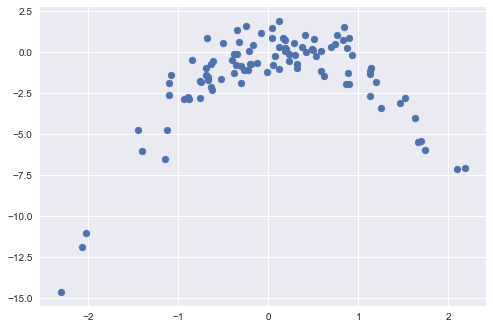

In [48]:
plt.scatter(x,y)

It looks quadratic. x values range from about -2 to 2 while y values range from -15 to 2.5.

### c. Compute LOOCV errors

In [49]:
import warnings
warnings.filterwarnings('ignore')
import sklearn.linear_model as skl_lm
import sklearn.model_selection as skl_ms
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(20)
data = pd.DataFrame(np.column_stack((x,y)), columns = ['x','y'])

p_order = np.arange(1,5) # array of degrees

for deg in p_order:
    loo = skl_ms.LeaveOneOut()
    regr = skl_lm.LinearRegression()
    poly1 = PolynomialFeatures(deg)
    x_poly = poly1.fit_transform(data.x.reshape(-1,1))
    score = skl_ms.cross_val_score(regr, x_poly, y, cv=loo, scoring='neg_mean_squared_error').mean()
    print('Polynomial Model {}:'.format(deg))
    print('    Leave One Out Mean Square Error: {}\n'.format(score*-1))

Polynomial Model 1:
    Leave One Out Mean Square Error: 7.9743294816

Polynomial Model 2:
    Leave One Out Mean Square Error: 0.982402047529

Polynomial Model 3:
    Leave One Out Mean Square Error: 0.981756824724

Polynomial Model 4:
    Leave One Out Mean Square Error: 1.01617073319



### d. Repeat with different seed

In [50]:
np.random.seed(200)

for deg in p_order:
    loo = skl_ms.LeaveOneOut()
    regr = skl_lm.LinearRegression()
    poly1 = PolynomialFeatures(deg)
    x_poly = poly1.fit_transform(data.x.reshape(-1,1))
    score = skl_ms.cross_val_score(regr, x_poly, y, cv=loo, scoring='neg_mean_squared_error').mean()
    print('Polynomial Model {}:'.format(deg))
    print('    Leave One Out Mean Square Error: {}\n'.format(score*-1))

Polynomial Model 1:
    Leave One Out Mean Square Error: 7.9743294816

Polynomial Model 2:
    Leave One Out Mean Square Error: 0.982402047529

Polynomial Model 3:
    Leave One Out Mean Square Error: 0.981756824724

Polynomial Model 4:
    Leave One Out Mean Square Error: 1.01617073319



The results for both seeds are the same since LOOCV uses n folds to predict a single point.

### e. Smallest LOOCV error

The quadratic model had the smallest LOOCV error. This is what I expected since the plot in b resembled a quadratic.  

### f. Statistical significance of the coefficient estimates

We will plot the best fit curve onto the graph, over the actual points

Polynomial Model 1:
    Leave One Out Mean Square Error: 7.9743294816

    Regression coefficients: [ 0.          0.72454382]



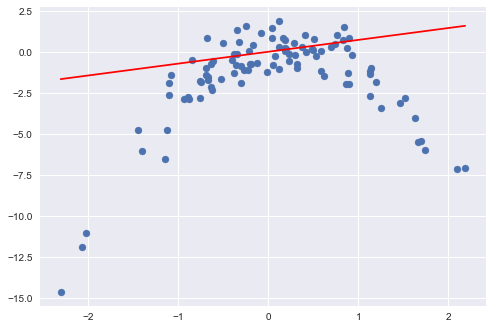

Polynomial Model 2:
    Leave One Out Mean Square Error: 0.982402047529

    Regression coefficients: [ 0.          0.98934516 -2.25942129]



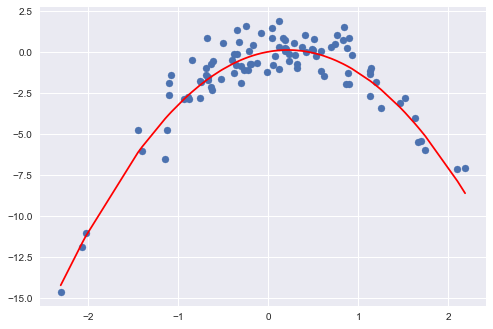

Polynomial Model 3:
    Leave One Out Mean Square Error: 0.981756824724

    Regression coefficients: [ 0.          0.81963401 -2.25102808  0.07149633]



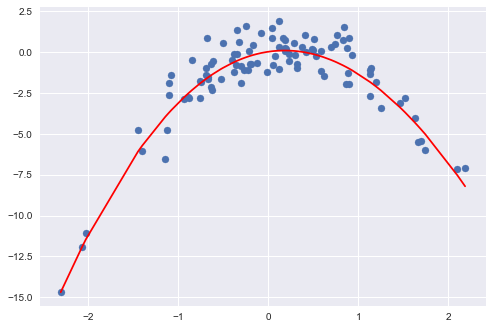

Polynomial Model 4:
    Leave One Out Mean Square Error: 1.01617073319

    Regression coefficients: [ 0.          0.81916469 -2.20841724  0.06997375 -0.01043353]



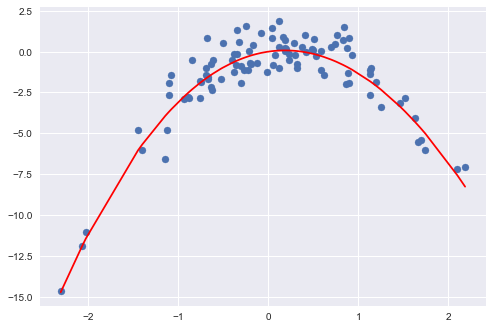

In [51]:
for deg in p_order:
    loo = skl_ms.LeaveOneOut()
    regr = skl_lm.LinearRegression()
    poly1 = PolynomialFeatures(deg)
    x_poly = poly1.fit_transform(data.x.reshape(-1,1))
    score = skl_ms.cross_val_score(regr, x_poly, y, cv=loo, scoring='neg_mean_squared_error').mean()
    regr.fit(x_poly,y)
    print('Polynomial Model {}:'.format(deg))
    print('    Leave One Out Mean Square Error: {}\n'.format(score*-1))
    print('    Regression coefficients: {}\n'.format(regr.coef_))
    plt.scatter(x,y)
    plt.plot(np.unique(x),np.poly1d(regr.coef_[::-1])(np.unique(x)),c='r')
    plt.show()

Plotting these results, after the quadratic model, the coefficients seem to have no big impact on the regression model. Using a higher degree polynomial will only lead to overfitting and poor results.

We can get quantify the statistical significance by finding the t value of the ceofficients 

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [53]:
var = np.column_stack((x**0,x,x**2,x**3,x**4,y))
df = pd.DataFrame(var,columns=['x0','x1','x2','x3','x4','y'])

In [57]:
# fit using R formula
mod = smf.ols(formula='y ~ x1 + x2 + x3 + x4', data=df)

In [58]:
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 09 Oct 2017   Prob (F-statistic):           9.02e-43
Time:                        14:20:36   Log-Likelihood:                -137.45
No. Observations:                 100   AIC:                             284.9
Df Residuals:                      95   BIC:                             297.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1945      0.145      1.337      0.185      -0.094       0.483
x1             0.8192      0.195      4.190      0.000       0.431       1.207
x2            -2.2084      0.265     -8.321      0.000      -2.735      -1.682
x3             0.0700      0.068      1.025      0.308      -0.066       0.205
x4            -0.0104      0.061     -0.170      0.865      -0.132       0.111
==============================================================================
Omnibus:                        0.438   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.544
Skew:                           0.147   Prob(JB):                        0.762
Kurtosis:                       2.789   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It looks like the coefficients for degree higher than 2 are not significant (low t value)